## Perceptron and Adaline
###	Perceptron Convergence And Widrow-Hoff (LMS) Learning Algorithms

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Linear Combiner
> calculate dot product of weight and input vector

In [2]:
def combiner( inputs, weights):
	return np.dot( weights.T, inputs)

### The Hard Limit Transfer Function
> if input is greater than or equal the threshold (zero) the output is 1 and 0 otherwise

In [3]:
def hardlim( x):
	return 1.0 if x >= 0.0 else 0.0

### Output
> Calculate output of Neuron given input and weight vector

In [4]:
#	calculate response by applying hardlim function on linear combination of input and weight vector
def output( inputs, weights):
	if inputs.ndim == 1:
		#	single input vector
		return hardlim( combiner( inputs, weights))
	else:
		#	multiple input vector
		return np.array( [ hardlim( i) for i in combiner( inputs, weights)])

### Preparing Input Vector
> add bias input (1) to input features and transpose it to have input with shape (_n_features, _n_samples)

In [5]:
def prepare( inputs):
	_n_samples = inputs.shape[ 0]

	return np.concatenate( ( np.ones( ( _n_samples, 1)), inputs), axis=1).T

###	Shuffle
> shuffle patterns to create stochasity

In [6]:
def shuffle( features, targets):
	#	concatenate features and target vectors together
	zipped = np.concatenate( ( features.T, targets.reshape( ( len( targets), 1))), axis=1)

	np.random.shuffle( zipped)

	#	seperate features
	shuffled_features = zipped[:,:-1].T

	#	seperate targets
	shuffled_targets = zipped[:, -1:].reshape( len( targets))
	
	return shuffled_features, shuffled_targets

### Score
> calculate the accuracy of prediction of Neuron

In [7]:
def score( inputs, weights, targets):
	#	prepare input
	inputs_with_bias = prepare( inputs)

	#	calculate output
	pred = output( inputs_with_bias, weights)
	#	non zero elements of vector resulting in subtracting desired response from calculated response
	#	is the number of false prediction which the ratio of it with all of samples is error
	#	hence 1 - error is the accuracy score
	return 1 - ( np.count_nonzero( pred - targets) / len( targets))

### Train Network
> batch or stochastic mode

> hard limit transfer or identity as activation function

In [8]:
#	inputs must be of shape(_n_samples, _n_features)
#	targets must be of shape(_n_samples,)
#	mode of training 0: batch, 1: stochastic
#	activation function: 0: hardlim, 1: identity
def fit( inputs, targets, max_epoch=10, eta=1, mode=0, early_stop=True, activation=0):
	_n_samples, _n_features = inputs.shape

	#	add bias to input vector
	inputs_with_bias = prepare( inputs)
	
	#	generate random weights from uniform distribution over [0,1)
	#	number of weights needed = number of features (variable) + 1 (for bias input)
	weights = np.random.rand( _n_features + 1)

	errors = []

	for epoch in range( max_epoch):
		#	calculate accuracy for early stopping
		accuracy = score( inputs, weights, targets)

		errors.append( 1 - accuracy)
		#	early stop
		if accuracy == 1.0 and early_stop: break

		if mode == 0:
			#	calculate output for all inputs
			pred = output( inputs_with_bias, weights) if activation == 0 else combiner( inputs_with_bias, weights)
			
			#	calculate error
			error = targets - pred

			#	update weigths
			weights += eta * np.dot( error, inputs_with_bias.T)
		else:
			#	shuffle input vector
			shuffled_inputs, shuffled_targets = shuffle( inputs_with_bias, targets)

			#	iterate over each sample
			for i in range( _n_samples):
				#	calculate outputs for single input
				pred = output( shuffled_inputs[:, i], weights) if activation == 0 else combiner( shuffled_inputs[:, i], weights)
				
				#	calculate error
				error = shuffled_targets[ i] - pred
				
				#	update weights
				weights += eta * ( error * shuffled_inputs[:, i])
				
	return weights, errors


### Split
> split the data into train and test set

In [9]:
def split( features, targets, train_size=0.5):
	data_size = len( features)

	frag = int( train_size * data_size)
	zipped = np.concatenate( ( features, targets.values.reshape( ( len( targets), 1))), axis=1)

	np.random.shuffle( zipped)

	X_train = zipped[:frag,:-1]

	X_test = zipped[ frag:,:-1]

	y_train = zipped[:frag, -1:]
	y_train = y_train.reshape( len( y_train))

	y_test = zipped[ frag:, -1:]
	y_test = y_test.reshape( ( len( y_test)))

	return X_train, X_test, y_train, y_test

###	Standardization
> standardize feature vector by subtracting mean and dividing by standard deviation

In [10]:
def standardize( inputs):
	std_input = np.copy( inputs).astype( "float")
	
	for i in range( std_input.shape[ 1]):
		std_input[:, i] = ( std_input[:, i] - std_input[:, i].mean()) / std_input[:, i].std()

	return std_input

### Drivers

Train Score Batch Mode with Hard Limit Activation Function: 1.0
Test Score Batch Mode with Hard Limit Activation Function: 0.98
Train Score Batch Mode with Identity Activation Function: 1.0
Test Score Batch Mode with Identity Activation Function: 0.98
Train Score Stochastic Mode with Hard Limit Activation Function: 1.0
Test Score Stochastic Mode with Hard Limit Activation Function: 1.0
Train Score Stochastic Mode Identity Activation Function: 1.0
Test Score Stochastic Mode Identity Activation Function: 1.0


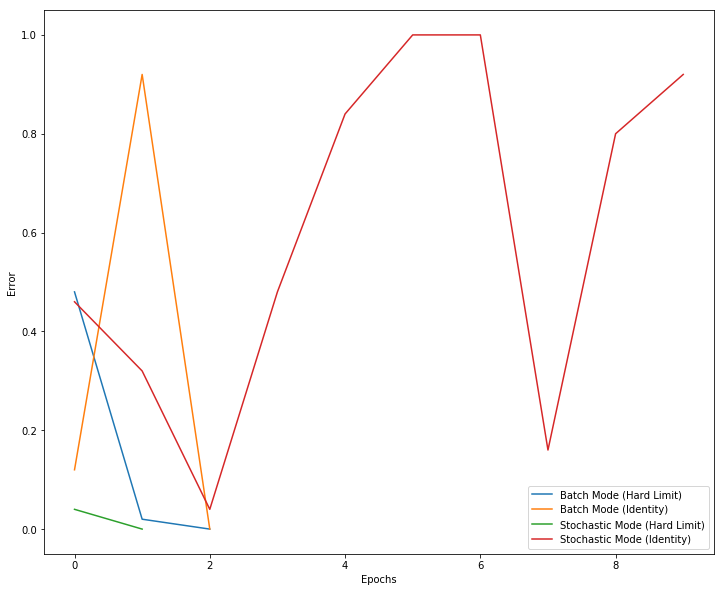

In [11]:
dataset = pd.read_csv( "iris.csv")

features = dataset.drop( "class", axis=1)
targets = dataset[ "class"]

standardized_features = standardize( features)

X_train, X_test, y_train, y_test = split( standardized_features, targets)

batch_weights_hardlim, batch_errors_hardlim = fit( X_train, y_train, mode=0, activation=0)
print( f"Train Score Batch Mode with Hard Limit Activation Function: { score( X_train, batch_weights_hardlim, y_train)}")
print( f"Test Score Batch Mode with Hard Limit Activation Function: { score( X_test, batch_weights_hardlim, y_test)}")

batch_weights_identity, batch_errors_identity = fit( X_train, y_train, mode=0, activation=1)
print( f"Train Score Batch Mode with Identity Activation Function: { score( X_train, batch_weights_identity, y_train)}")
print( f"Test Score Batch Mode with Identity Activation Function: { score( X_test, batch_weights_identity, y_test)}")

stochastic_weights_hardlim, stochastic_errors_hardlim = fit( X_train, y_train, mode=1, activation=0)
print( f"Train Score Stochastic Mode with Hard Limit Activation Function: { score( X_train, stochastic_weights_hardlim, y_train)}")
print( f"Test Score Stochastic Mode with Hard Limit Activation Function: { score( X_test, stochastic_weights_hardlim, y_test)}")

stochastic_weights_identity, stochastic_errors_identity = fit( X_train, y_train, mode=1, activation=1)
print( f"Train Score Stochastic Mode Identity Activation Function: { score( X_train, stochastic_weights_identity, y_train)}")
print( f"Test Score Stochastic Mode Identity Activation Function: { score( X_test, stochastic_weights_identity, y_test)}")

plt.figure( figsize=( 12, 10))
plt.plot( batch_errors_hardlim, label="Batch Mode (Hard Limit)")
plt.plot( batch_errors_identity, label="Batch Mode (Identity)")
plt.plot( stochastic_errors_hardlim, label="Stochastic Mode (Hard Limit)")
plt.plot( stochastic_errors_identity, label="Stochastic Mode (Identity)")
plt.xlabel( "Epochs")
plt.ylabel( "Error")
plt.legend()
plt.show()
